In [1]:
import pandas as pd

In [29]:
import string
import re
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
pd.set_option('display.max_colwidth', 200)
import matplotlib.pyplot as plt

In [132]:
from sklearn.model_selection import train_test_split

In [34]:
import_df = pd.read_csv("ipatest.csv")
import_df = import_df.dropna()

In [35]:
ipa_array = np.array(import_df)

In [105]:
ipa_array[0:]

array([['hice', "'i-se"],
       ['combinación', "kom-bi-na-'si̯on"],
       ['inicio', "i-'ni-si̯o"],
       ['educación', "e-ðu-ka-'si̯on"],
       ['hasta', "'as-ta"],
       ['ojo', "'o-ho"],
       ['casi', "'ka-si"],
       ['usar', "u-'saɾ"],
       ['funcionar', "fun-si̯o-'naɾ"],
       ['cantar', "kan-'taɾ"],
       ['ayuda', "a-'ju-ða"],
       ['hombre', "'om-bɾe"],
       ['está', "es-'ta"],
       ['sabe', "'sa-βe"],
       ['oportunidad', "o-poɾ-tu-ni-'ðað"],
       ['toque', "'to-ke"],
       ['él', "'el"],
       ['su', "'su"],
       ['hermana', "eɾ-'ma-na"],
       ['esta', "'es-ta"],
       ['taza', "'ta-sa"],
       ['importante', "im-poɾ-'tan-te"],
       ['qué', "'ke"],
       ['el', "'el"],
       ['tanto', "'tan-to"],
       ['son', "'son"],
       ['masa', "'ma-sa"],
       ['diez', "'di̯es"],
       ['eso', "'e-so"],
       ['éxito', "'ek-si-to"],
       ['extra', "'eks-tɾa"],
       ['miedo', "'mi̯e-ðo"],
       ['voy', "'βoi̯"],
       ['leí', "le-'i"],
    

## In this dataset, the x axis is the Spanish word, the y axis is the ipa transcription with the accents and syllable breaks

## Let's get a better idea of what the string data actually looks like:

In [106]:
# first, let's grab one of the Spanish words
spanish_word = ipa_array[45][0]
print("Spanish Word: ", spanish_word)
for i,e in enumerate(spanish_word):
    print(i, e)

Spanish Word:  diario
0 d
1 i
2 a
3 r
4 i
5 o


In [107]:
# let's grab one of the IPA words
ipa_word = ipa_array[45][1]
print("IPA Word: ", ipa_word)
for i,e in enumerate(ipa_word):
    print(i,e)

IPA Word:  'di̯a-ɾi̯o
0 '
1 d
2 i
3 ̯
4 a
5 -
6 ɾ
7 i
8 ̯
9 o


## As we can see, the lengths are going to be different. Obviously, there is the addition of the syllable breaks (`-`) and the accent marks (`'`), but there is also the factor of the semi-vowel markings, which are being interpreted as new characters (` ̯`)

In [108]:
# lets test one more, just to see what it might look like
spanish_word2 = ipa_array[55][0]
print("Spanish Word: ", spanish_word2)
for i,e in enumerate(spanish_word2):
    print(i, e)

Spanish Word:  patrón
0 p
1 a
2 t
3 r
4 ó
5 n


In [109]:
ipa_word2 = ipa_array[55][1]
print("IPA Word: ", ipa_word2)
for i,e in enumerate(ipa_word2):
    print(i,e)

IPA Word:  pa-'tɾon
0 p
1 a
2 -
3 '
4 t
5 ɾ
6 o
7 n


# So it looks like the accented "o" (`ó`) is still read as a single character. This all is good information to know before moving forward

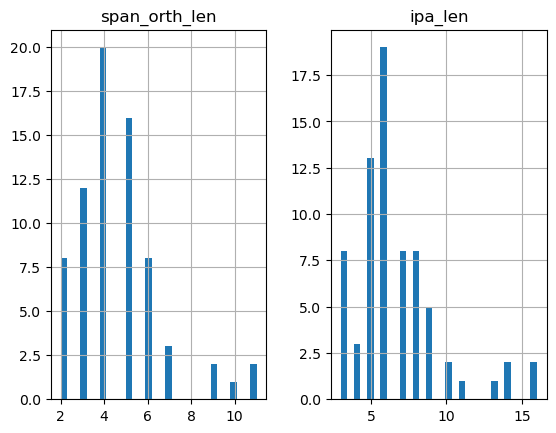

In [110]:
spanish_orth_len = [len(st) for st in ipa_array[:,0]]

ipa_len = [len(st) for st in ipa_array[:,1]]
    
length_df = pd.DataFrame({'span_orth_len':spanish_orth_len, 'ipa_len':ipa_len})

length_df.hist(bins = 30)
plt.show()

In [111]:
spanish_lists = []
ipa_lists = []

for i in ipa_array[:]:
    # iterate through characters in spanish
    _span_str = i[0]
    # create empty list
    _span_list = []
    # iterate through spanish characters
    for x,e in enumerate(_span_str):
        _span_list.append(e)
      
    # iterate through characters in ipa
    _ipa_str = i[1]
    _ipa_list = []
    # iterate through ipa characters
    for x,e in enumerate(_ipa_str):
        _ipa_list.append(e)
        
    # create a new string where each word is a list
    spanish_spaces = " ".join(_span_list)
    spanish_lists.append(spanish_spaces)
    ipa_spaces = " ".join(_ipa_list)
    ipa_lists.append(ipa_spaces)
    
    
        

In [112]:
def merge(list1, list2):
     
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

In [113]:
ipa_list_tup = merge(spanish_lists, ipa_lists)
ipa_array_clean = np.array(ipa_list_tup)

In [114]:
ipa_array_clean

array([['h i c e', "' i - s e"],
       ['c o m b i n a c i ó n', "k o m - b i - n a - ' s i ̯ o n"],
       ['i n i c i o', "i - ' n i - s i ̯ o"],
       ['e d u c a c i ó n', "e - ð u - k a - ' s i ̯ o n"],
       ['h a s t a', "' a s - t a"],
       ['o j o', "' o - h o"],
       ['c a s i', "' k a - s i"],
       ['u s a r', "u - ' s a ɾ"],
       ['f u n c i o n a r', "f u n - s i ̯ o - ' n a ɾ"],
       ['c a n t a r', "k a n - ' t a ɾ"],
       ['a y u d a', "a - ' j u - ð a"],
       ['h o m b r e', "' o m - b ɾ e"],
       ['e s t á', "e s - ' t a"],
       ['s a b e', "' s a - β e"],
       ['o p o r t u n i d a d', "o - p o ɾ - t u - n i - ' ð a ð"],
       ['t o q u e', "' t o - k e"],
       ['é l', "' e l"],
       ['s u', "' s u"],
       ['h e r m a n a', "e ɾ - ' m a - n a"],
       ['e s t a', "' e s - t a"],
       ['t a z a', "' t a - s a"],
       ['i m p o r t a n t e', "i m - p o ɾ - ' t a n - t e"],
       ['q u é', "' k e"],
       ['e l', "' e l"],
       ['t

In [125]:
def tokenization(lines):
    # explicitly add filters to assure hyphens and apostrophes are not removed
    tokenizer = keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,/:;<=>?@[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [126]:
span_orth_tokenizer = tokenization(ipa_array_clean[:, 0])
span_orth_vocab_size = len(span_orth_tokenizer.word_index) + 1

In [127]:
ipa_tokenizer = tokenization(ipa_array_clean[:, 1])
ipa_vocab_size = len(ipa_tokenizer.word_index) + 1

In [128]:
span_orth_tokenizer.word_index

{'a': 1,
 'e': 2,
 'o': 3,
 'r': 4,
 't': 5,
 'i': 6,
 's': 7,
 'n': 8,
 'l': 9,
 'c': 10,
 'u': 11,
 'd': 12,
 'm': 13,
 'h': 14,
 'y': 15,
 'p': 16,
 'í': 17,
 'é': 18,
 'b': 19,
 'ó': 20,
 'x': 21,
 'q': 22,
 'z': 23,
 'v': 24,
 'g': 25,
 'j': 26,
 'f': 27,
 'á': 28,
 'ú': 29}

In [129]:
ipa_tokenizer.word_index

{'-': 1,
 "'": 2,
 'a': 3,
 'e': 4,
 'o': 5,
 'i': 6,
 's': 7,
 't': 8,
 'ɾ': 9,
 'n': 10,
 '̯': 11,
 'k': 12,
 'l': 13,
 'u': 14,
 'm': 15,
 'ð': 16,
 'p': 17,
 'β': 18,
 'd': 19,
 'r': 20,
 'ʝ': 21,
 'b': 22,
 'w': 23,
 'h': 24,
 'f': 25,
 'j': 26,
 'ɣ': 27,
 'ŋ': 28,
 'g': 29}

In [140]:
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = keras.preprocessing.sequence.pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [141]:
# break dataset into training and testing arrs
train, test = train_test_split(ipa_array_clean, test_size=0.2, random_state = 12)


In [142]:
span_length = 8
ipa_length = 8

In [143]:
trainX = encode_sequences(span_orth_tokenizer, span_length, train[:, 1])
trainY = encode_sequences(ipa_tokenizer, ipa_length, train[:, 0])


In [146]:
# prepare validation data
testX = encode_sequences(span_orth_tokenizer, span_length, test[:, 1])
testY = encode_sequences(ipa_tokenizer, ipa_length, test[:, 0])

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, RepeatVector
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras import optimizers

In [152]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

In [158]:
# model compilation
model = define_model(span_orth_vocab_size, ipa_vocab_size, span_length, ipa_length, 512)
rms = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [159]:
filename = 'model.h1.24_jan_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [160]:
# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 3.4018
Epoch 1: val_loss improved from inf to 3.22329, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 10s 10s/step - loss: 3.4018 - val_loss: 3.2233
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 3.2197
Epoch 2: val_loss improved from 3.22329 to 2.12570, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 3.2197 - val_loss: 2.1257
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 2.2486
Epoch 3: val_loss did not improve from 2.12570
1/1 [==============================] - 0s 221ms/step - loss: 2.2486 - val_loss: 2.9173
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 2.8868
Epoch 4: val_loss improved from 2.12570 to 1.85373, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 6s 6s/step - loss: 2.8868 - val_loss: 1.8537
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 1.8659
Epoch 5: val_loss improved from 1.85373 to 1.82648, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 1.8659 - val_loss: 1.8265
Epoch 6/30
1/1 [==============================] - ETA: 0s - loss: 1.7948
Epoch 6: val_loss improved from 1.82648 to 1.78783, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 1.7948 - val_loss: 1.7878
Epoch 7/30
1/1 [==============================] - ETA: 0s - loss: 1.8104
Epoch 7: val_loss did not improve from 1.78783
1/1 [==============================] - 0s 220ms/step - loss: 1.8104 - val_loss: 2.1103
Epoch 8/30
1/1 [==============================] - ETA: 0s - loss: 1.9774
Epoch 8: val_loss did not improve from 1.78783
1/1 [==============================] - 0s 194ms/step - loss: 1.9774 - val_loss: 1.8525
Epoch 9/30
1/1 [==============================] - ETA: 0s - loss: 1.8617
Epoch 9: val_loss did not improve from 1.78783
1/1 [==============================] - 0s 231ms/step - loss: 1.8617 - val_loss: 1.8149
Epoch 10/30
1/1 [==============================] - ETA: 0s - loss: 1.7122
Epoch 10: val_loss improved from 1.78783 to 1.69125, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 1.7122 - val_loss: 1.6912
Epoch 11/30
1/1 [==============================] - ETA: 0s - loss: 1.6363
Epoch 11: val_loss did not improve from 1.69125
1/1 [==============================] - 0s 241ms/step - loss: 1.6363 - val_loss: 1.7310
Epoch 12/30
1/1 [==============================] - ETA: 0s - loss: 1.5920
Epoch 12: val_loss improved from 1.69125 to 1.64914, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 6s 6s/step - loss: 1.5920 - val_loss: 1.6491
Epoch 13/30
1/1 [==============================] - ETA: 0s - loss: 1.5662
Epoch 13: val_loss did not improve from 1.64914
1/1 [==============================] - 0s 229ms/step - loss: 1.5662 - val_loss: 1.8350
Epoch 14/30
1/1 [==============================] - ETA: 0s - loss: 1.5529
Epoch 14: val_loss did not improve from 1.64914
1/1 [==============================] - 0s 199ms/step - loss: 1.5529 - val_loss: 1.6972
Epoch 15/30
1/1 [==============================] - ETA: 0s - loss: 1.6115
Epoch 15: val_loss did not improve from 1.64914
1/1 [==============================] - 0s 200ms/step - loss: 1.6115 - val_loss: 1.8160
Epoch 16/30
1/1 [==============================] - ETA: 0s - loss: 1.6040
Epoch 16: val_loss improved from 1.64914 to 1.64597, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 1.6040 - val_loss: 1.6460
Epoch 17/30
1/1 [==============================] - ETA: 0s - loss: 1.5949
Epoch 17: val_loss did not improve from 1.64597
1/1 [==============================] - 0s 219ms/step - loss: 1.5949 - val_loss: 2.0220
Epoch 18/30
1/1 [==============================] - ETA: 0s - loss: 1.5668
Epoch 18: val_loss did not improve from 1.64597
1/1 [==============================] - 0s 211ms/step - loss: 1.5668 - val_loss: 1.6670
Epoch 19/30
1/1 [==============================] - ETA: 0s - loss: 1.5361
Epoch 19: val_loss improved from 1.64597 to 1.63385, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 1.5361 - val_loss: 1.6339
Epoch 20/30
1/1 [==============================] - ETA: 0s - loss: 1.4425
Epoch 20: val_loss improved from 1.63385 to 1.57613, saving model to model.h1.24_jan_19


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


INFO:tensorflow:Assets written to: model.h1.24_jan_19/assets


1/1 [==============================] - 7s 7s/step - loss: 1.4425 - val_loss: 1.5761
Epoch 21/30
1/1 [==============================] - ETA: 0s - loss: 1.4066
Epoch 21: val_loss did not improve from 1.57613
1/1 [==============================] - 0s 207ms/step - loss: 1.4066 - val_loss: 1.7186
Epoch 22/30
1/1 [==============================] - ETA: 0s - loss: 1.3683
Epoch 22: val_loss did not improve from 1.57613
1/1 [==============================] - 0s 209ms/step - loss: 1.3683 - val_loss: 1.5862
Epoch 23/30
1/1 [==============================] - ETA: 0s - loss: 1.3724
Epoch 23: val_loss did not improve from 1.57613
1/1 [==============================] - 0s 204ms/step - loss: 1.3724 - val_loss: 1.8632
Epoch 24/30
1/1 [==============================] - ETA: 0s - loss: 1.3948
Epoch 24: val_loss did not improve from 1.57613
1/1 [==============================] - 0s 183ms/step - loss: 1.3948 - val_loss: 1.6715
Epoch 25/30
1/1 [==============================] - ETA: 0s - loss: 1.5057
Epoch 

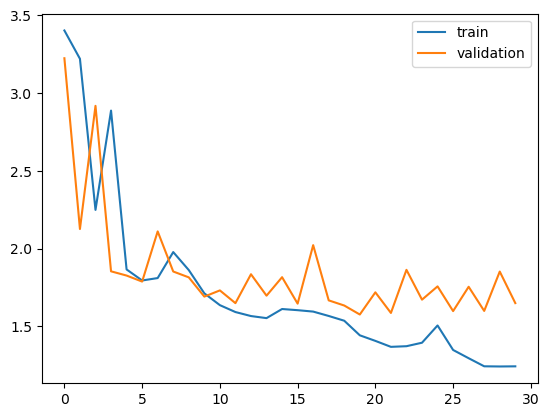

In [161]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [168]:
span_orth_tokenizer.word_index.items()

dict_items([('a', 1), ('e', 2), ('o', 3), ('r', 4), ('t', 5), ('i', 6), ('s', 7), ('n', 8), ('l', 9), ('c', 10), ('u', 11), ('d', 12), ('m', 13), ('h', 14), ('y', 15), ('p', 16), ('í', 17), ('é', 18), ('b', 19), ('ó', 20), ('x', 21), ('q', 22), ('z', 23), ('v', 24), ('g', 25), ('j', 26), ('f', 27), ('á', 28), ('ú', 29)])

In [181]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        print(word)
        print(index)
        if index == n:
            return word
        return None

In [177]:
model = load_model('model.h1.24_jan_19')
preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1])))


2023-03-09 08:32:40.710022: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 08:32:40.952778: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 08:32:40.964419: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 08:32:41.046944: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-09 08:32:41.123871: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _ou

1/1 [==============================] - 1s 824ms/step


In [180]:
preds[1]

array([[6.15835078e-02, 2.05350462e-02, 2.10810229e-02, 7.95980096e-02,
        5.74750192e-02, 4.38120849e-02, 3.91941927e-02, 5.57049736e-02,
        5.53096645e-02, 1.90660134e-02, 3.21168266e-02, 2.21119784e-02,
        2.17514429e-02, 3.98641042e-02, 3.43126282e-02, 3.59164812e-02,
        2.20789015e-02, 2.50261594e-02, 2.08719224e-02, 3.62056419e-02,
        5.36756516e-02, 2.00752616e-02, 2.65462305e-02, 1.99329648e-02,
        2.80079413e-02, 2.15073563e-02, 2.27688290e-02, 2.18607634e-02,
        2.13165805e-02, 2.06928868e-02],
       [1.36049747e-01, 7.33420951e-03, 7.79055431e-03, 1.55844525e-01,
        8.42928663e-02, 5.31577431e-02, 3.60135585e-02, 7.13009238e-02,
        8.07762966e-02, 6.08034572e-03, 2.80813985e-02, 8.80315900e-03,
        8.39284156e-03, 3.53672095e-02, 2.48719640e-02, 2.99631059e-02,
        8.83443188e-03, 1.16687426e-02, 7.53916986e-03, 3.36202309e-02,
        8.04833844e-02, 7.13542197e-03, 1.52884880e-02, 6.88690599e-03,
        1.31452782e-02,

In [182]:
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], span_orth_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], span_orth_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 
    preds_text.append(' '.join(temp))

a
1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()